# COVID-19 Data Analysis Portfolio Project

## Introduction

In this portfolio project, we delve into the analysis of COVID-19 data, focusing on five countries: Afghanistan, China, Canada, the USA, and South Africa. Our objective is to explore various facets of the COVID-19 pandemic, including trends in cases and deaths, the impact of government interventions, healthcare capacity, testing, and vaccination progress.

### Questions to Explore:

1. **How do COVID-19 trends differ among these countries in terms of cases and deaths?**
2. **What is the impact of government interventions (stringency index) on the spread of COVID-19?**
3. **How does healthcare capacity (ICU patients, hospitalizations) and testing (new tests, total tests) vary across these countries?**
4. **What is the progress of vaccination efforts, and how does it correlate with COVID-19 cases and deaths?**

## Data Source:

The data utilized for this analysis is sourced from Our World in Data, spanning from 2020 to 2021.

## Approach:

Descriptive statistics and data visualization techniques will be employed to gain insights from the data. We will also utilize statistical inference to test the significance of our findings. 

### Methodology:

1. **Data Preparation:** We import necessary libraries, load and inspect the data, filter relevant columns, and handle missing values.
2. **Regression Analysis:** We aim to understand the relationship between various factors and total COVID-19 cases using regression analysis. Feature selection and model evaluation are conducted to ensure robustness.
3. **Multicollinearity Handling:** Correlation analysis is performed to identify and mitigate multicollinearity issues.
4. **Country-wise Analysis:** Separate dataframes are created for each country to facilitate detailed analysis.
5. **Visualization:** COVID-19 trends, including total cases, new cases, and vaccination progress, are visualized for each country.
6. **Government Intervention Impact:** We explore the relationship between government interventions and new COVID-19 cases for each country.



## Data Preparation

Before diving into the analysis, we need to ensure that our environment is set up correctly. This involves importing the necessary libraries and tools that we'll be using throughout the project. Let's start by bringing in the essential libraries for data manipulation, visualization, and statistical analysis.

### Importing Necessary Libraries

We begin by importing the following libraries:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline


### Loading and Inspecting the Data

In [15]:
df = pd.read_csv('covid_data_cleaned.csv')
print(df.head())

  iso_code     location       date  total_cases  new_cases  \
0      AFG  Afghanistan  2/24/2020          1.0        1.0   
1      AFG  Afghanistan  2/25/2020          1.0        0.0   
2      AFG  Afghanistan  2/26/2020          1.0        0.0   
3      AFG  Afghanistan  2/27/2020          1.0        0.0   
4      AFG  Afghanistan  2/28/2020          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  ...  stringency_index  population  \
0                    0.026  ...              8.33  38928341.0   
1                    0.026  ...              8.33  38928341.0   

In [16]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               85171 non-null  object 
 1   location                               85171 non-null  object 
 2   date                                   85171 non-null  object 
 3   total_cases                            83072 non-null  float64
 4   new_cases                              83070 non-null  float64
 5   new_cases_smoothed                     82069 non-null  float64
 6   total_deaths                           73408 non-null  float64
 7   new_deaths                             73566 non-null  float64
 8   new_deaths_smoothed                    82069 non-null  float64
 9   total_cases_per_million                82623 non-null  float64
 10  new_cases_per_million                  82621 non-null  float64
 11  ne

In [17]:
print(df.columns)

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'popula

### Data Filtering and Feature Selection
The dataset contains numerous columns, each providing different information about the COVID-19 pandemic. For our analysis, we will focus on the following key columns:

- `total_cases`: Cumulative number of confirmed COVID-19 cases
- `new_cases`: Number of new confirmed COVID-19 cases
- `total_deaths`: Cumulative number of confirmed COVID-19 deaths
- `new_deaths`: Number of new confirmed COVID-19 deaths
- `total_vaccinations`: Total number of COVID-19 vaccination doses administered
- `stringency_index`: Government response stringency index
- `gdp_per_capita`: GDP per capita
- `total_tests`: Total number of COVID-19 tests conducted
- `positive_rate`: Proportion of positive tests
- `hospital_beds_per_thousand`: Number of hospital beds per thousand people
- `population`: Total population of the country
- `life_expectancy`: Average life expectancy
- `human_development_index`: Human Development Index
- `median_age`: Median age of the population
- `aged_65_older`: Proportion of the population aged 65 and older
- `aged_70_older`: Proportion of the population aged 70 and older
- `people_vaccinated`: Number of people who have received at least one vaccine dose
- `people_fully_vaccinated`: Number of people who have been fully vaccinated

By focusing on these columns, we aim to analyze and understand the key aspects of the COVID-19 pandemic across different countries.


In [18]:
# List of relevant columns
relevant_columns = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
    'total_vaccinations', 'stringency_index', 'gdp_per_capita', 
    'total_tests', 'positive_rate', 'hospital_beds_per_thousand',
    'population', 'life_expectancy', 'human_development_index',
    'median_age', 'aged_65_older', 'aged_70_older',
    'people_vaccinated', 'people_fully_vaccinated'
]

# Filter the DataFrame to include only relevant columns
df_filtered = df[['iso_code', 'date'] + relevant_columns]


### Handling Missing Values

We observe that our dataset contains a lot of missing values. To ensure a smooth analysis, we will handle these missing values using the forward fill method (`ffill`). Becuase  This method is particularly useful for time-series data, like our COVID-19 dataset, as it maintains continuity in the dataset.

In [19]:
df_filtered.fillna(method='ffill', inplace=True)


C:\Users\najyw\AppData\Local\Temp\ipykernel_1264\1494986163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)


now let's check our filtered dataframe

In [20]:
df_filtered.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,stringency_index,gdp_per_capita,total_tests,positive_rate,hospital_beds_per_thousand,population,life_expectancy,human_development_index,median_age,aged_65_older,aged_70_older,people_vaccinated,people_fully_vaccinated
0,AFG,2/24/2020,1.0,1.0,NaN,NaN,NaN,8.33,1803.987,NaN,NaN,0.5,38928341.0,64.83,0.511,18.6,2.581,1.337,NaN,NaN
1,AFG,2/25/2020,1.0,0.0,NaN,NaN,NaN,8.33,1803.987,NaN,NaN,0.5,38928341.0,64.83,0.511,18.6,2.581,1.337,NaN,NaN
2,AFG,2/26/2020,1.0,0.0,NaN,NaN,NaN,8.33,1803.987,NaN,NaN,0.5,38928341.0,64.83,0.511,18.6,2.581,1.337,NaN,NaN
3,AFG,2/27/2020,1.0,0.0,NaN,NaN,NaN,8.33,1803.987,NaN,NaN,0.5,38928341.0,64.83,0.511,18.6,2.581,1.337,NaN,NaN
4,AFG,2/28/2020,1.0,0.0,NaN,NaN,NaN,8.33,1803.987,NaN,NaN,0.5,38928341.0,64.83,0.511,18.6,2.581,1.337,NaN,NaN


## Regression Analysis

Now, let's dive into performing regression analysis to understand the relationship between various factors and the total number of COVID-19 cases. This step involves preparing our data, selecting relevant features, training a regression model, and evaluating its performance.

### Data Preparation for Regression

Before we proceed with the regression analysis, we need to prepare our data. This involves:

- **Feature Selection:** Selecting relevant features that might influence the total number of COVID-19 cases. We'll use these features to train our regression model.
- **Data Splitting:** Splitting the dataset into training and testing sets to assess the model's performance on unseen data.
- **Data Scaling:** Scaling the features to ensure that each feature contributes equally to the analysis and to improve the convergence of the optimization algorithm.

Let's go through each step and prepare our data for regression analysis.


In [21]:

# Prepare data for regression
X = df_filtered[relevant_columns].fillna(0)
y = df_filtered['total_cases'].fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize linear regression model
model = LinearRegression()

# Forward feature selection
sfs = SFS(model, k_features='best', forward=True, scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train_scaled, y_train)
selected_features = list(sfs.k_feature_names_)
print('Selected features:', selected_features)

selected_model = LinearRegression().fit(X_train_scaled[:, sfs.k_feature_idx_], y_train)

# Make predictions
y_pred_train = selected_model.predict(X_train_scaled[:, sfs.k_feature_idx_])
y_pred_test = selected_model.predict(X_test_scaled[:, sfs.k_feature_idx_])

# Evaluate model performance
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


Selected features: ['0', '1', '2', '5', '6', '7', '8', '11', '13']
Train RMSE: 3.1325697061370665e-08
Test RMSE: 3.164932205879573e-08


The Root Mean Squared Error (RMSE) values obtained from our regression model suggest potential overfitting, as they are unusually small. To mitigate this issue, we need to address multicollinearity among features, which can lead to overfitting.
Multicollinearity occurs when two or more features in the dataset are highly correlated, leading to redundancy in the information they provide to the model. This can result in unstable estimates and inflated coefficients, ultimately leading to overfitting. To identify highly correlated features, we'll conduct a correlation analysis among the selected features. Features with correlation coefficients greater than a certain threshold (0.9) will be considered highly correlated and removed from the dataset to mitigate multicollinearity.


### Handling Multicollinearity

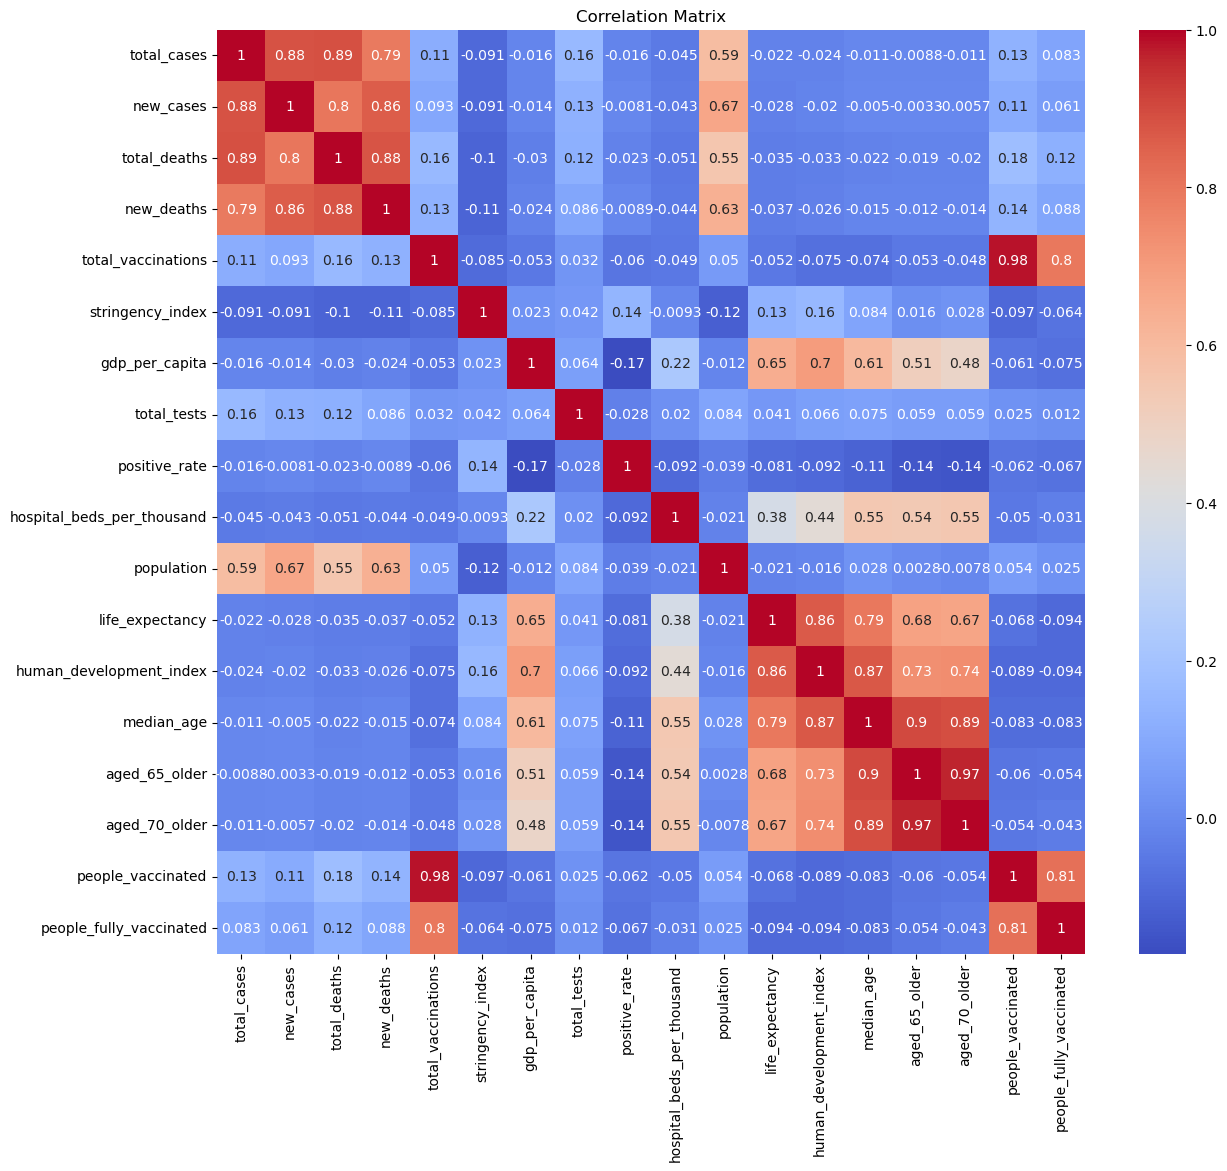

['aged_65_older', 'aged_70_older', 'people_vaccinated']


In [22]:
corr_matrix = df_filtered[relevant_columns].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Removing highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_filtered = df_filtered[['iso_code', 'date'] + [col for col in relevant_columns if col not in to_drop]]
print(to_drop)

### Creating Country-Specific Dataframes

In this step, we create individual dataframes for each country of interest, namely Afghanistan, China, Canada, USA, and South Africa. These country-specific dataframes will enable us to conduct in-depth analysis and visualization tailored to each country's COVID-19 data.

#### Selected Countries:
- Afghanistan
- China
- Canada
- USA
- South Africa

By isolating the data for each country, we can gain insights into the unique trends and patterns of the COVID-19 pandemic within their respective contexts.


In [23]:
afg = df_filtered[df_filtered['iso_code'] == 'AFG']
chn = df_filtered[df_filtered['iso_code'] == 'CHN']
can = df_filtered[df_filtered['iso_code'] == 'CAN']
usa = df_filtered[df_filtered['iso_code'] == 'USA']
s_a = df_filtered[df_filtered['iso_code'] == 'ZAF']
dataframes = [afg, chn, can, usa, s_a]
labels = ['Afghanistan', 'China', 'Canada', 'USA', 'South Africa']


### Checking for Missing Values

To ensure the integrity of our data before proceeding with analysis, we perform a thorough check for missing values within each country's dataframe.


In [24]:
print('Afghanistan:', afg.isnull().sum())
print('China:', chn.isnull().sum())
print('Canada:', can.isnull().sum())
print('U.S.A:', usa.isnull().sum())
print('South Africa:', s_a.isnull().sum())


Afghanistan: iso_code                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                   27
new_deaths                     27
total_vaccinations            364
stringency_index                0
gdp_per_capita                  0
total_tests                   432
positive_rate                 432
hospital_beds_per_thousand      0
population                      0
life_expectancy                 0
human_development_index         0
median_age                      0
people_fully_vaccinated       432
dtype: int64
China: iso_code                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_vaccinations            0
stringency_index              0
gdp_per_capita                0
total_tests                   0
positive_rate                 0
hospital_beds_per_thousand    0
popul

We observed no missing values in the datasets of all countries except  some columns of Afghanistan.

### Visualizing COVID-19 Trends

After handling missing values, we proceed to visualize the COVID-19 trends across different countries. Utilizing Matplotlib and Seaborn libraries, we generate line plots illustrating the total COVID-19 cases over time for each country.


### plotting Total Cases of each country

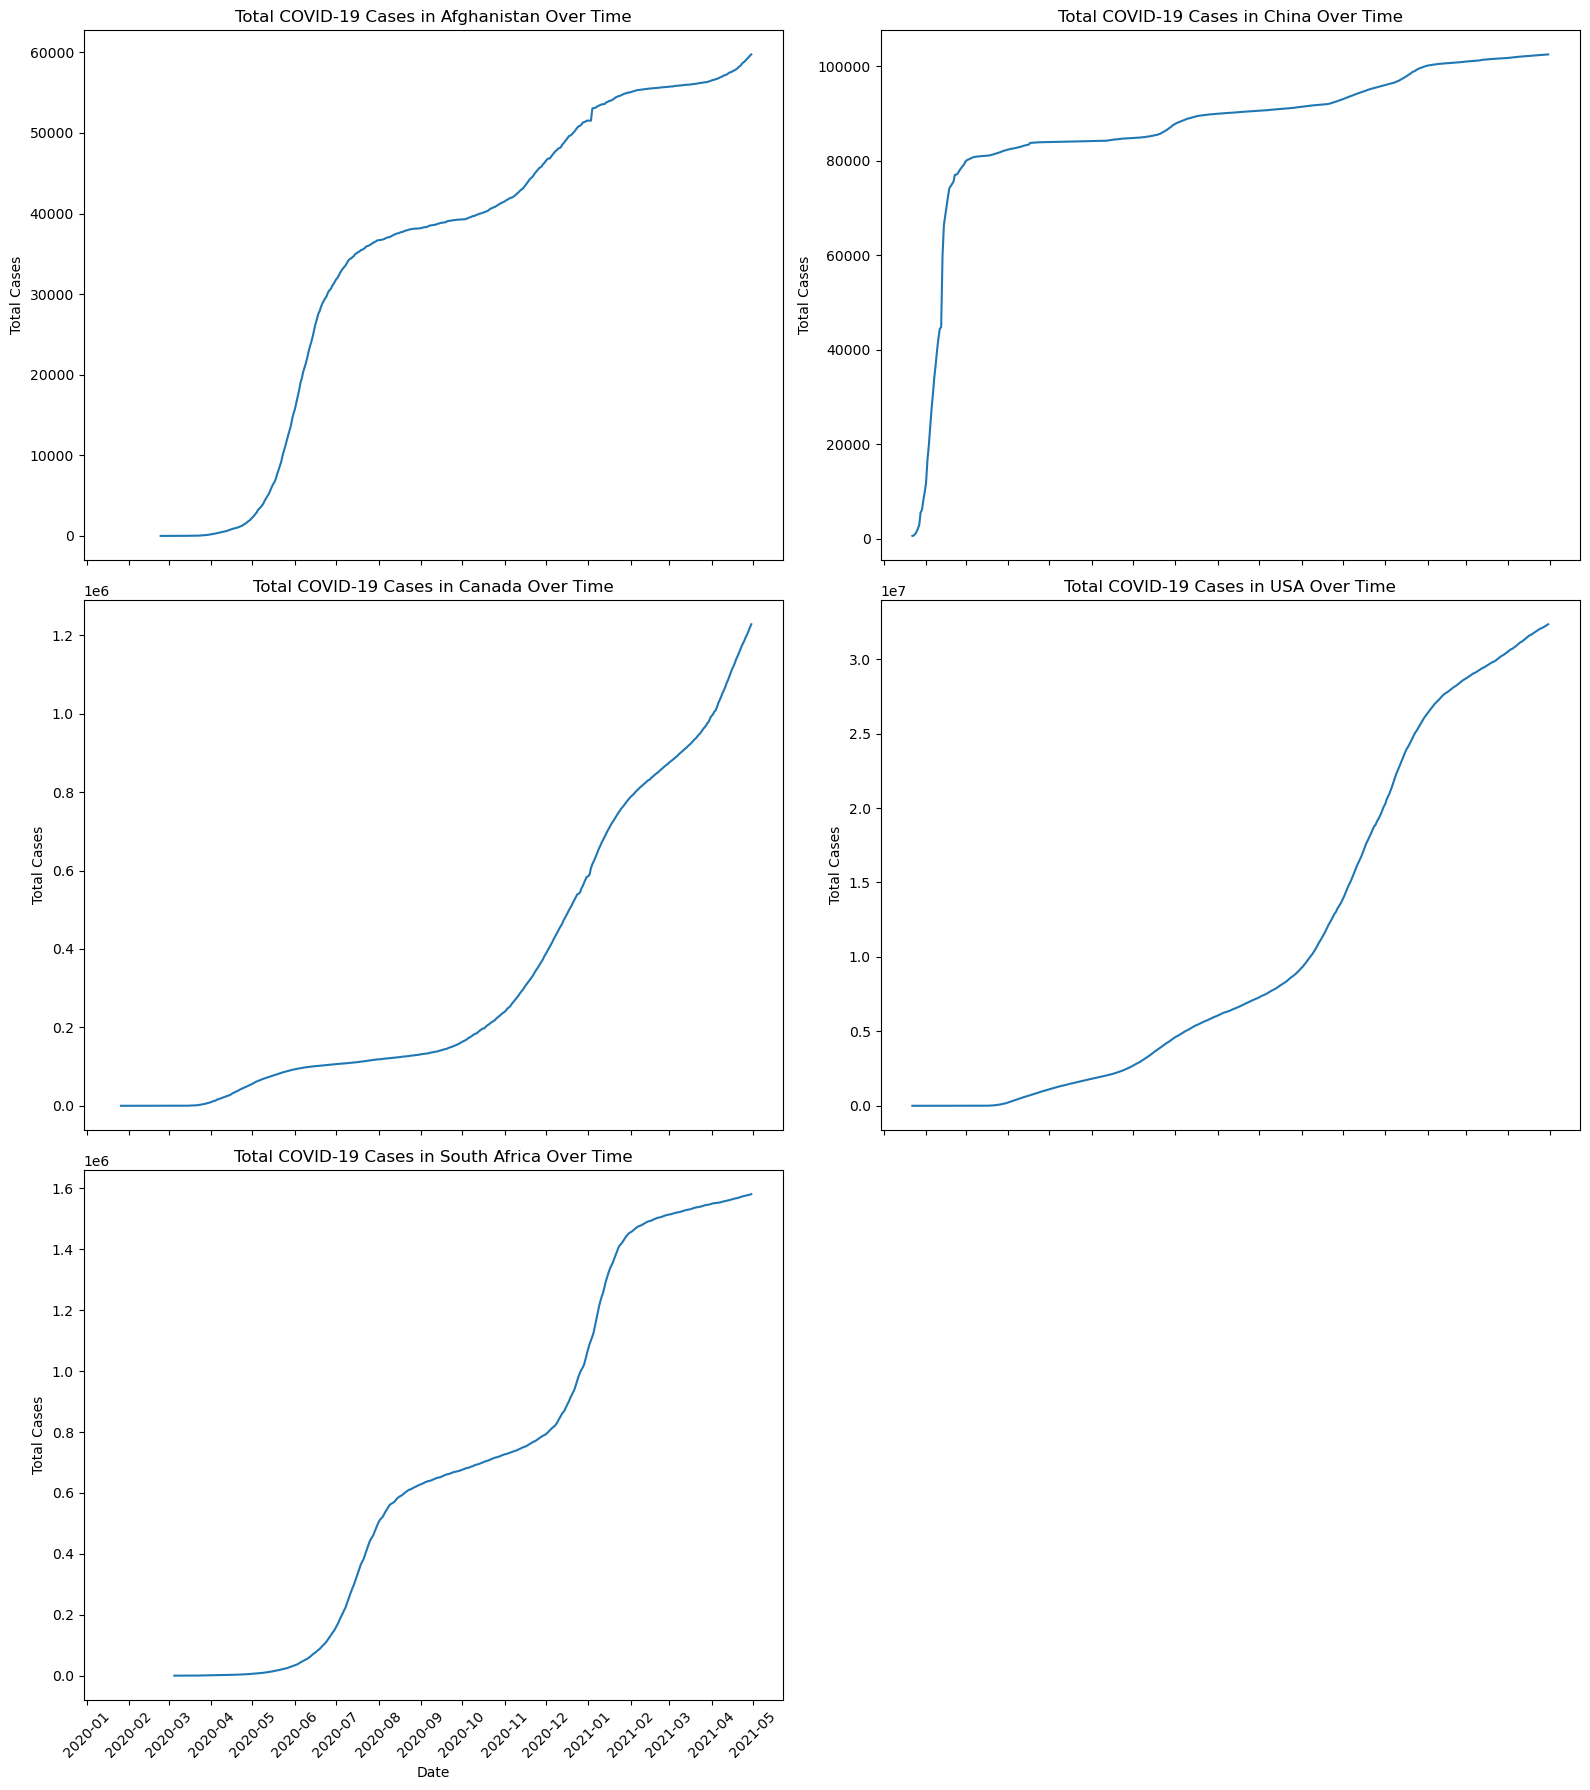

In [36]:

# List of dataframes and labels
dataframes = [afg, chn, can, usa, s_a]
labels = ['Afghanistan', 'China', 'Canada', 'USA', 'South Africa']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18), sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot data for each country in a subplot
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.lineplot(data=df, x='date', y='total_cases', ax=axes[i])
    axes[i].set_title(f'Total COVID-19 Cases in {label} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Total Cases')

    # Define the date format and locator for the x-axis
    date_locator = mdates.MonthLocator()  # Set locator to month
    date_formatter = mdates.DateFormatter('%Y-%m')  # Set formatter to year-month

    # Apply the date format and locator
    axes[i].xaxis.set_major_locator(date_locator)
    axes[i].xaxis.set_major_formatter(date_formatter)

    # Rotate and align the x-tick labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Remove the empty subplot (since we have 5 countries and 6 subplots)
fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


The visualizations unveil notable disparities in COVID-19 trends across the examined countries. The United States emerges as the most impacted, characterized by a staggering rise in total cases, notably escalating from November 2021 onwards. Similarly, Canada and South Africa undergo a pronounced surge during this period. China witnesses a substantial spike in cases post-February and March 2020; however, after this initial surge, the number of total COVID-19 cases increases gradually and steadily. Afghanistan displays comparatively lower and more gradual upticks in total cases compared to the United States and Canada.




Now, let's visualize the new COVID-19 cases for each country.

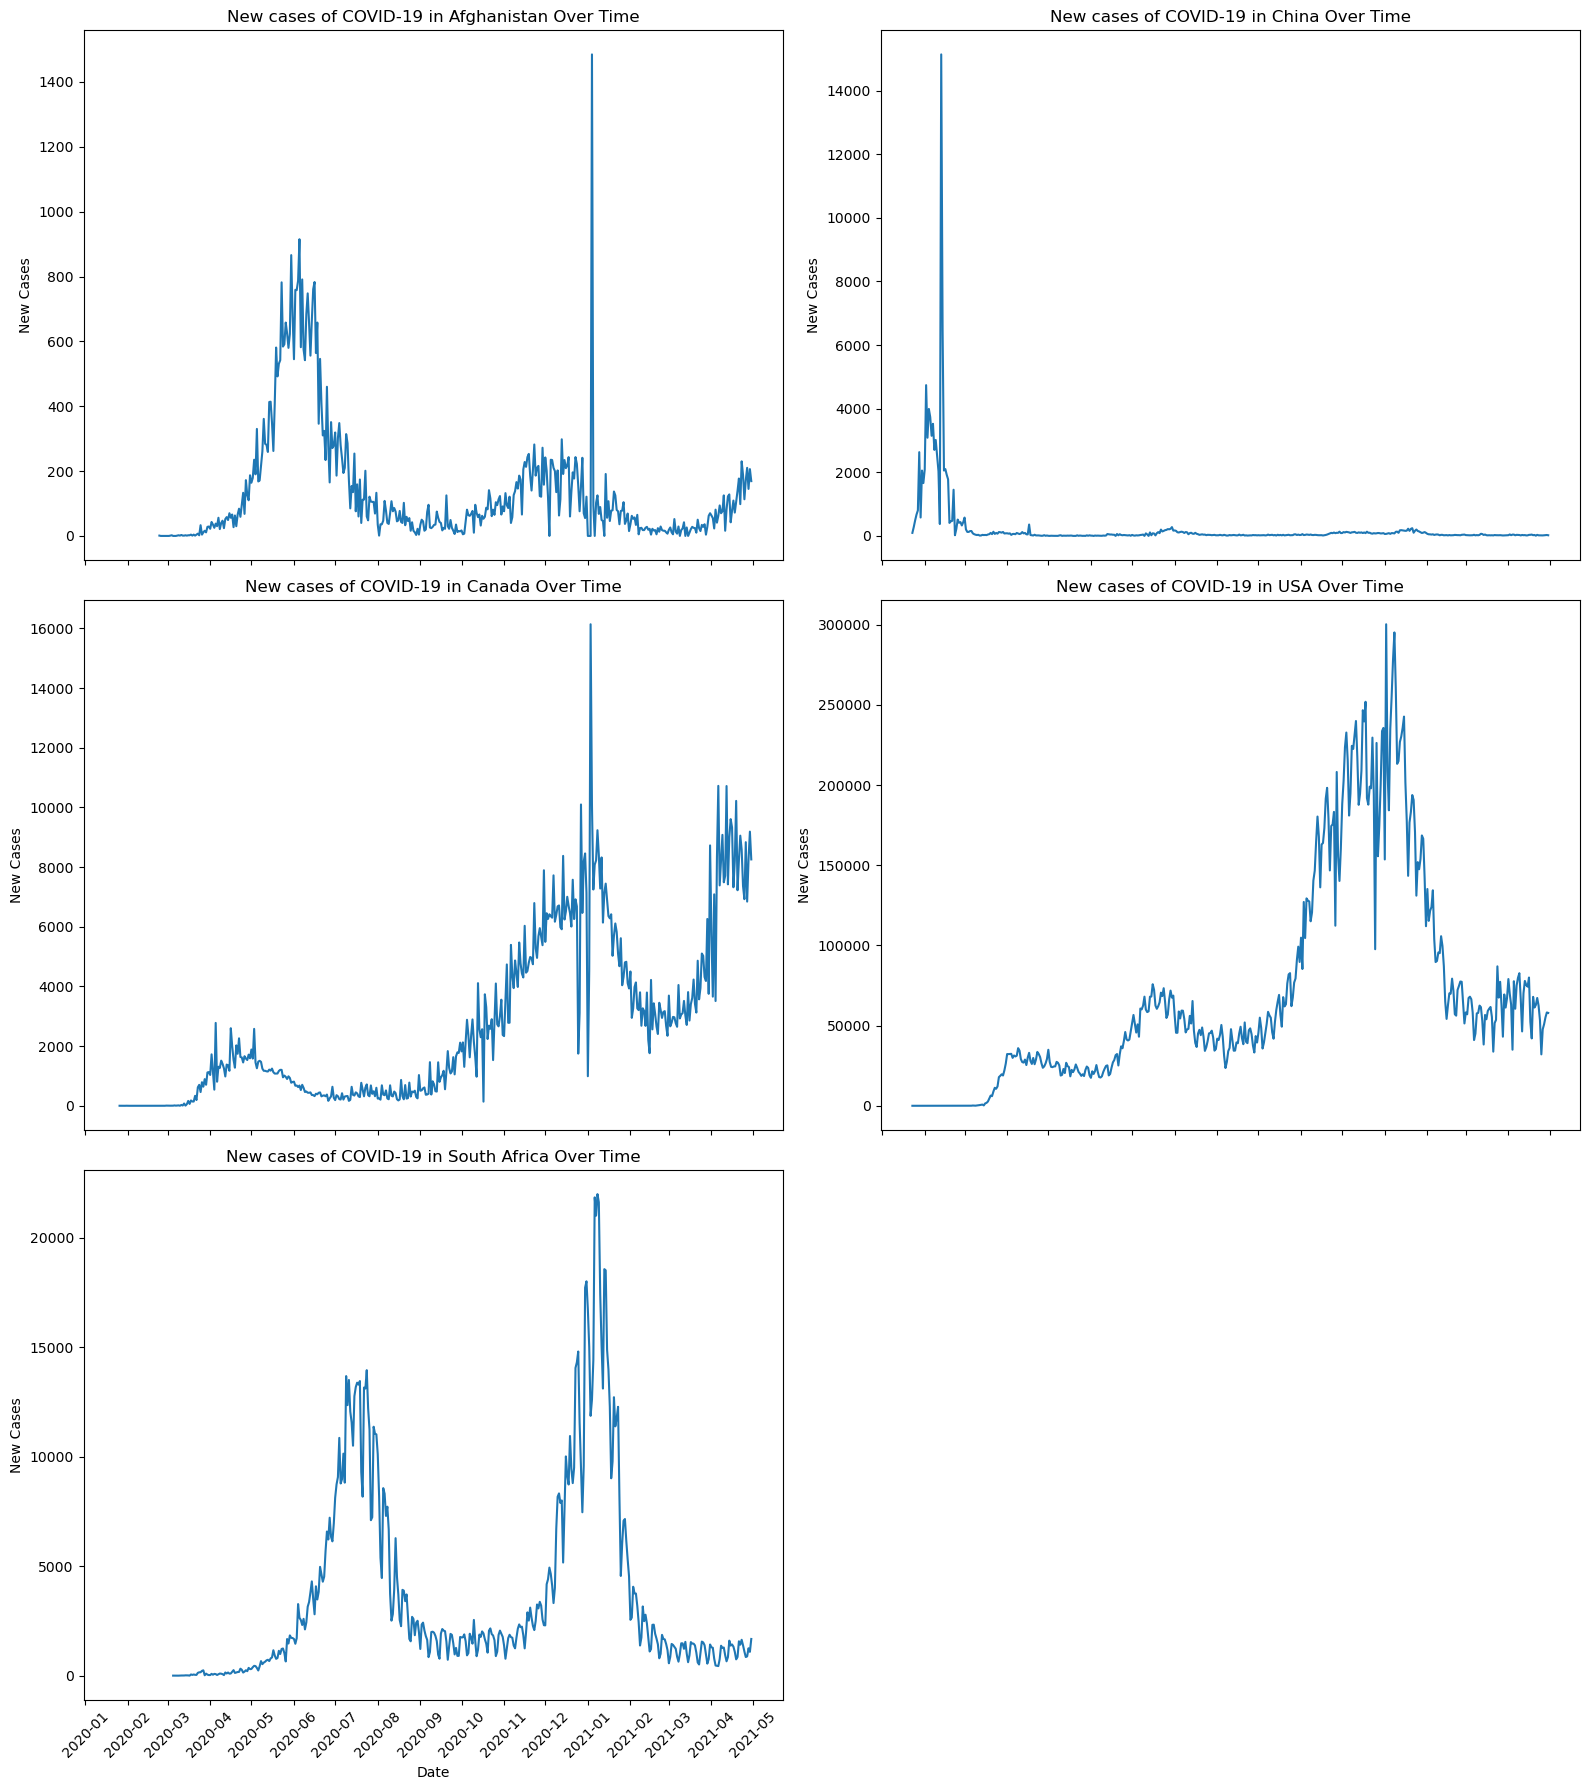

In [37]:
# Import necessary libraries
import matplotlib.dates as mdates
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18), sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot data for each country in a subplot
for i, (country_df, label) in enumerate(zip(dataframes, labels)):
    sns.lineplot(data=country_df, x='date', y='new_cases', ax=axes[i])
    axes[i].set_title(f'New cases of COVID-19 in {label} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('New Cases')

    # Define the date format and locator for the x-axis
    date_locator = mdates.MonthLocator()  # Set locator to month
    date_formatter = mdates.DateFormatter('%Y-%m')  # Set formatter to year-month

    # Apply the date format and locator
    axes[i].xaxis.set_major_locator(date_locator)
    axes[i].xaxis.set_major_formatter(date_formatter)

    # Rotate and align the x-tick labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Remove the empty subplot (since we have 5 countries and 6 subplots)
fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

The visualizations of new COVID-19 cases reveal notable trends and patterns among the analyzed countries:

- **Afghanistan**: The number of new cases surged significantly during May and June then decreased. Another sharp increase occurred in January, followed by a subsequent decline.
  
- **China**: New cases peaked dramatically in February and March 2020. After this initial surge, the number of new cases decreased and remained relatively stable without any further rapid increases.

- **Canada**: A substantial rise in new cases was observed at the beginning of 2021, marking an upward trend during this period.

- **United States**: Similar to Canada, the U.S. experienced a significant increase in new cases at the start of 2021. However, after February, the trend showed a decline.

- **South Africa**: The number of new cases peaked in July 2020 and January 2021. During other months, the case numbers remained relatively consistent without dramatic fluctuations.


plotting the total cases of each country

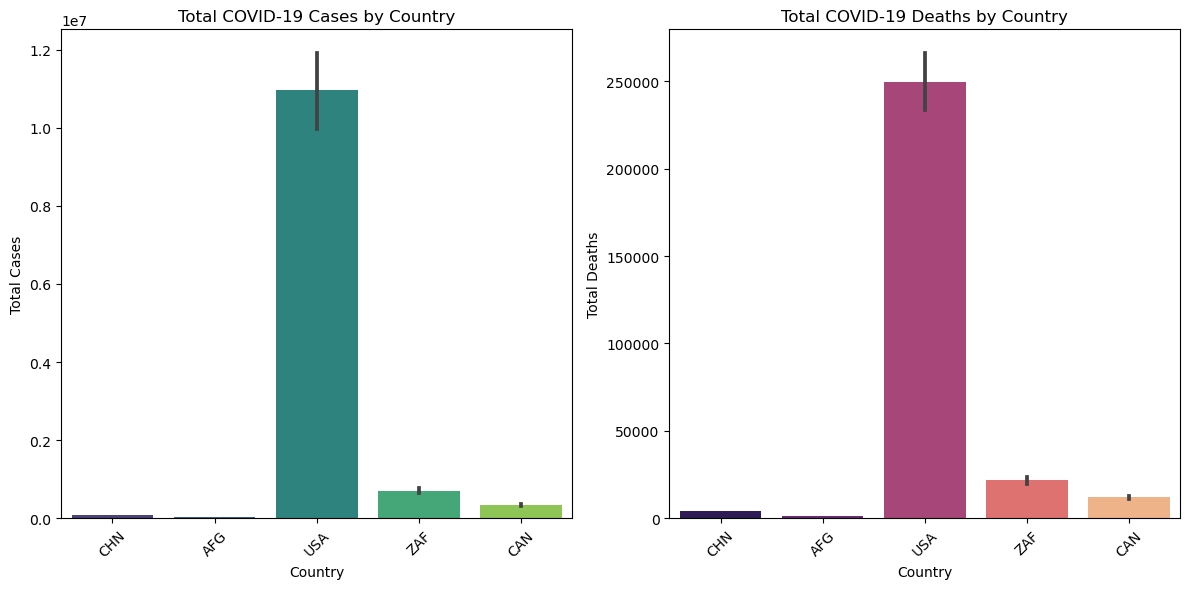

In [38]:
plt.figure(figsize=(12, 6))

# Concatenate the dataframes along the rows
combined_df = pd.concat([chn, afg, usa, s_a, can])

# Total cases comparison
plt.subplot(1, 2, 1)
sns.barplot(data=combined_df, x='iso_code', y='total_cases', palette='viridis')
plt.title('Total COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)

# Total deaths comparison
plt.subplot(1, 2, 2)
sns.barplot(data=combined_df, x='iso_code', y='total_deaths', palette='magma')
plt.title('Total COVID-19 Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The analysis reveals varying levels of impact across countries. The USA has the highest total COVID-19 cases and deaths, followed by South Africa, Canada, China, and Afghanistan. These differences highlight the diverse effects of the pandemic across different regions.



Next, we'll visualize the COVID-19 vaccination progress in these countries.


C:\Users\najyw\AppData\Local\Temp\ipykernel_1264\1403230458.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


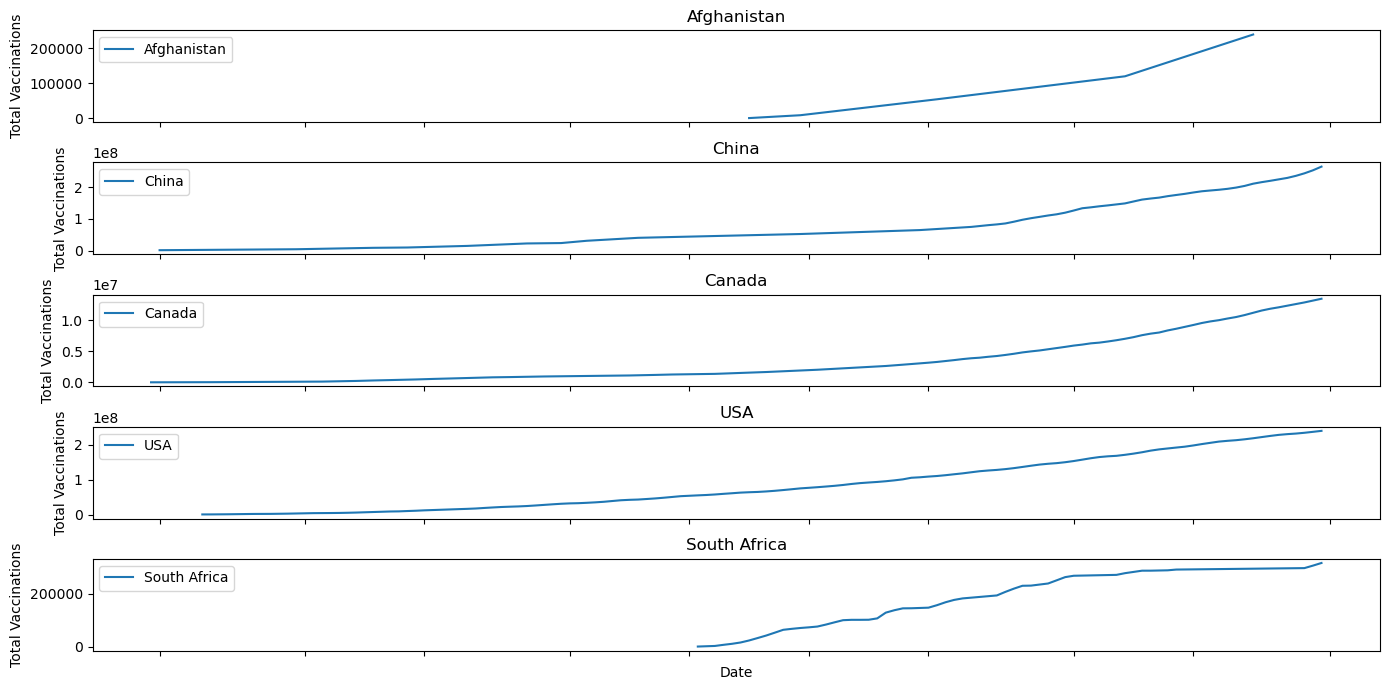

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 7), sharex=True)
countries = [afg, chn, can, usa, s_a]
country_names = ['Afghanistan', 'China', 'Canada', 'USA', 'South Africa']

for ax, country, country_name in zip(axes, countries, country_names):
    sns.lineplot(data=country, x='date', y='total_vaccinations', ax=ax)
    ax.set_title(country_name)
    ax.set_ylabel('Total Vaccinations')
    ax.legend([country_name], loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.xlabel('Date')
plt.show()


The visualization underscores a discernible trend in vaccination progress across the examined countries. Developed nations like China and the USA were among the earliest to commence vaccination campaigns, while developing countries like Afghanistan and South Africa initiated their vaccination efforts at a later stage.


Now, we'll explore the relationship between the stringency index (a measure of government intervention) and new COVID-19 cases for each country in our dataset. This analysis aims to shed light on how government policies may have influenced the spread of the virus over time.

Additionally, we'll calculate the correlation between the stringency index and new cases, and conduct a regression analysis to predict new cases based on the stringency index and date.


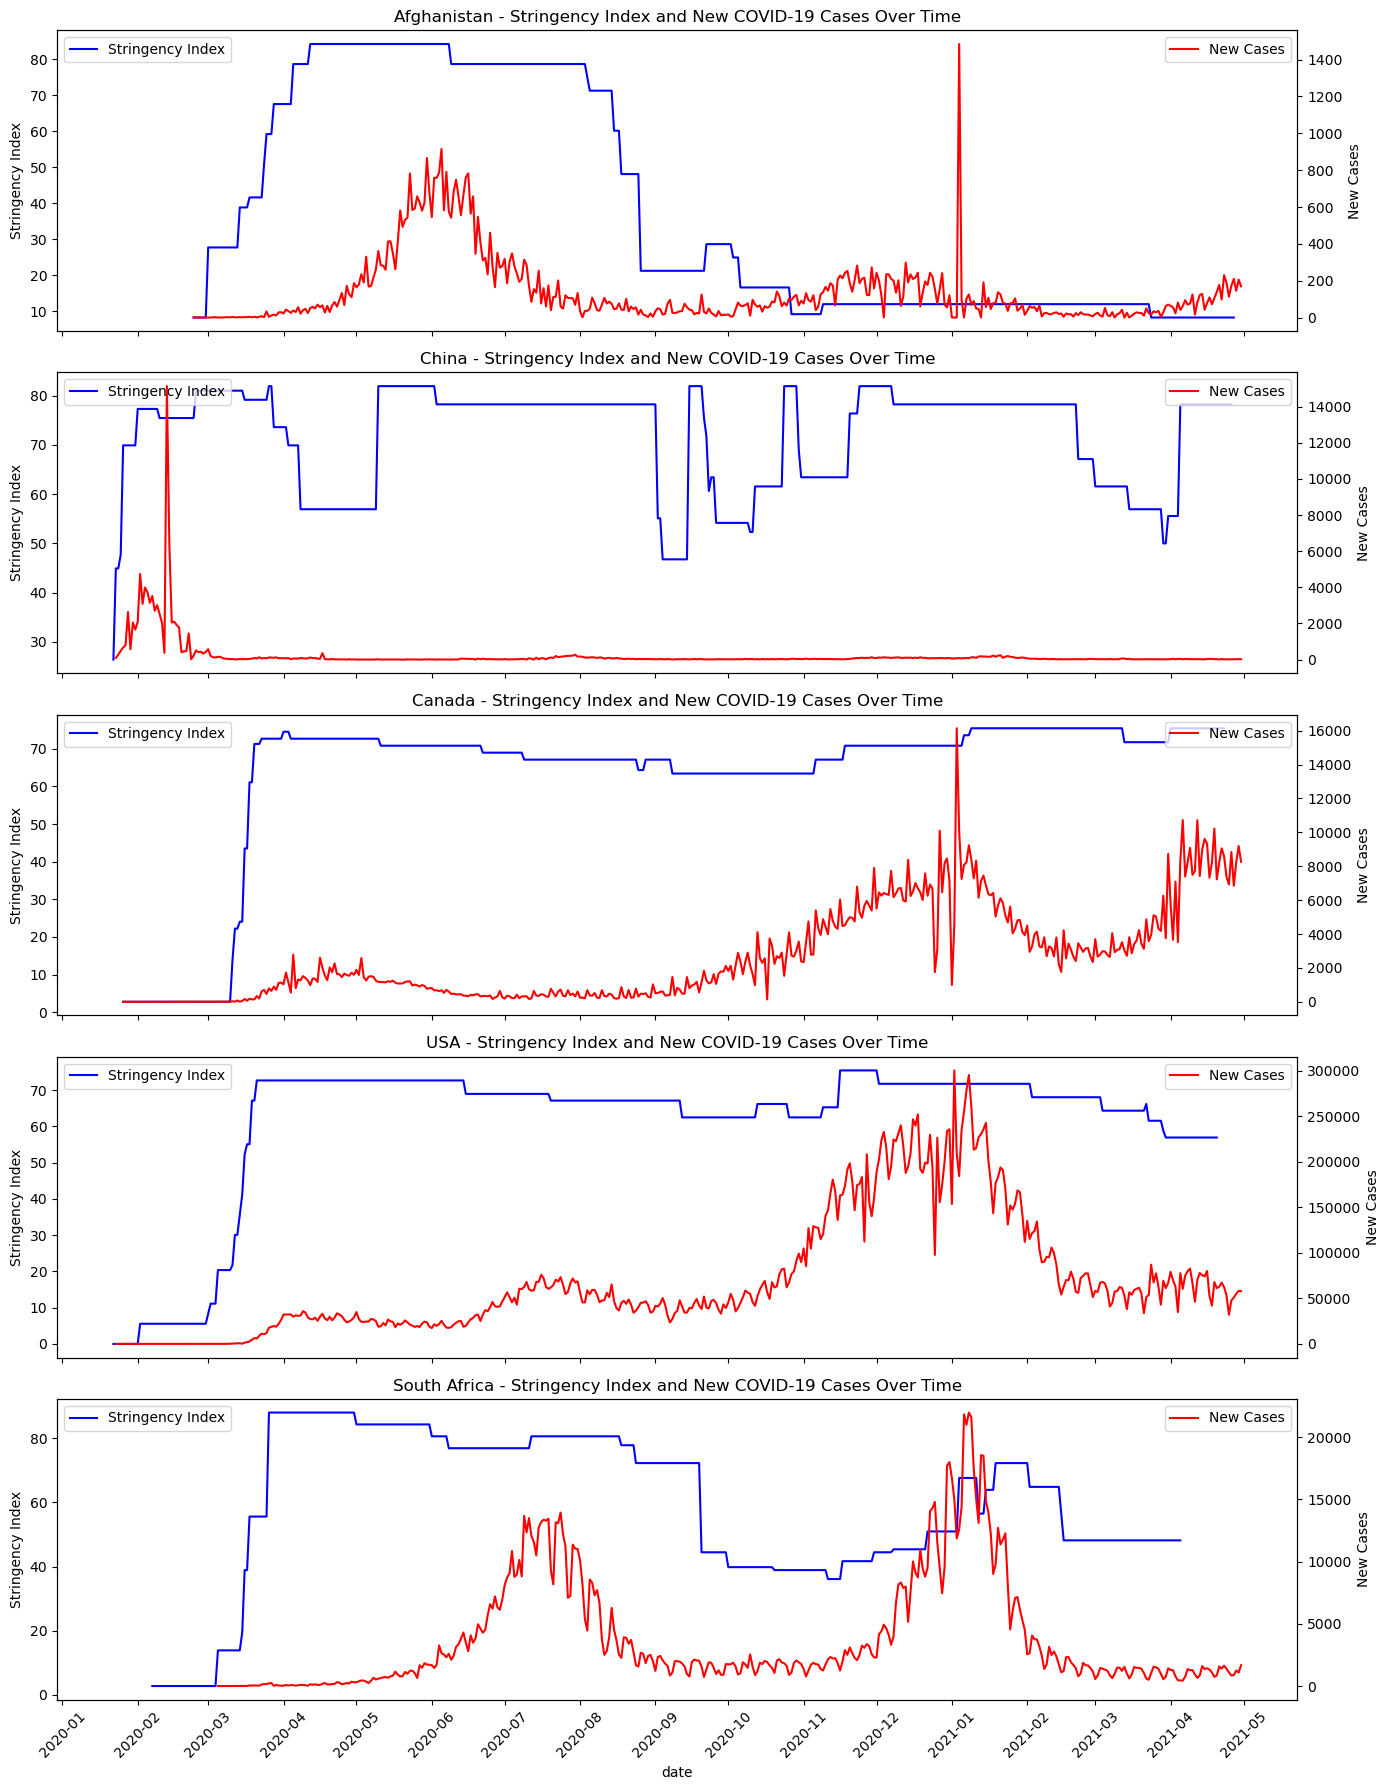

In [40]:
# Create subplots for each country
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 18), sharex=True)

countries = [afg, chn, can, usa, s_a]
country_names = ['Afghanistan', 'China', 'Canada', 'USA', 'South Africa']

for ax, country, country_name in zip(axes, countries, country_names):
    ax2 = ax.twinx()
    sns.lineplot(data=country, x='date', y='stringency_index', ax=ax, color='blue', label='Stringency Index')
    sns.lineplot(data=country, x='date', y='new_cases', ax=ax2, color='red', label='New Cases')
    ax.set_title(f'{country_name} - Stringency Index and New COVID-19 Cases Over Time')
    ax.set_ylabel('Stringency Index')
    ax2.set_ylabel('New Cases')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

In the plot, we observe distinct patterns for each country regarding the relationship between the stringency index and new COVID-19 cases:

- **China**: The blue line (representing the stringency index) consistently remains above the red line (indicating new COVID-19 cases), implying that stringent government measures effectively controlled the virus spread. This resulted in a decline in new cases over time.

- **Canada and the USA**: Similar to China, the blue line consistently exceeds the red line for both countries, indicating effective control measures. This suggests that government interventions contributed to curbing the spread of the virus, leading to a decrease in new cases over time.

- **South Africa**: Although the red line briefly surpasses the blue line, indicating a surge in new cases, the situation stabilizes thereafter. This suggests that while there may have been challenges initially, subsequent measures helped in managing the pandemic.

- **Afghanistan**: The red line occasionally exceeds the blue line, indicating challenges in effectively managing the pandemic. This suggests that despite government interventions, there were periods of increased transmission, highlighting the need for further measures or support.


  
## Key Findings:

The analysis delves into the multifaceted landscape of COVID-19 trends across the examined countries, offering insights into the differential impacts of government interventions and vaccination endeavors. Here are the key findings:

### 1. COVID-19 Trends:
The visualizations uncover a tapestry of COVID-19 trajectories, portraying distinctive patterns across the studied nations. Notably, the United States, Canada, and South Africa witness substantial surges in total cases, accentuated prominently from November 2021 onwards. In contrast, China's experience stands out, marked by a significant spike in cases post-February and March 2020, followed by a more stabilized trajectory. Afghanistan exhibits comparatively subdued and gradual upticks in total cases, juxtaposed against the more pronounced trends observed in other nations.

### 2. Vaccination Progress:
The visualization of vaccination trends elucidates a notable disparity between developed and developing nations in the initiation and execution of vaccination campaigns. Developed countries like China and the USA demonstrate earlier and more comprehensive vaccination drives, underscoring their proactive approach in combating the pandemic. Conversely, developing countries such as Afghanistan and South Africa grapple with slower vaccination rollouts, reflecting resource constraints and logistical challenges.

### 3. Impact of Government Interventions:
Analyzing the relationship between the stringency index, indicative of government interventions, and new COVID-19 cases offers valuable insights. Stringent measures in China, Canada, and the USA correlate with reduced transmission rates, indicating the effectiveness of government interventions in curtailing the spread of the virus. In contrast, fluctuations in new cases in South Africa and Afghanistan suggest nuanced challenges in managing the pandemic, underscoring the importance of context-specific approaches tailored to each country's dynamics.

## Conclusion:

In conclusion, the analysis underscores the intricate interplay of factors influencing COVID-19 dynamics, ranging from government policies and vaccination efforts to socioeconomic and healthcare disparities. While developed nations exhibit proactive responses and robust healthcare infrastructures, developing countries face formidable challenges in mitigating the impact of the pandemic. Moving forward, addressing these disparities requires concerted global efforts, encompassing equitable vaccine distribution, enhanced healthcare capacity, and tailored interventions to safeguard public health and foster resilience in the face of evolving threats.